$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, execute
from qiskit.extensions import UnitaryGate
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor










### Dirac Notation

$(1,0,0,0) \rightarrow \ket{00}$

$(0,1,0,0) \rightarrow \ket{01}$

$(0,0,1,0) \rightarrow \ket{10}$

$(0,0,0,1) \rightarrow \ket{11}$

# Measurement: Bell Operator Basis

*Physical Review Letters, 70:13, 1895. 29 March 1993*

Eqns 1,2

https://researcher.watson.ibm.com/researcher/files/us-bennetc/BBCJPW.pdf.

$U=\begin{bmatrix}
\Psi_{12}^{(+)}\\
-\Psi_{12}^{(-)}\\
\Phi_{12}^{(+)}\\
\Phi_{12}^{(-)}
\end{bmatrix}=\begin{bmatrix}
0&1&1&0\\
0&-1&1&0\\
1&0&0&1\\
1&0&0&-1
\end{bmatrix}/\sqrt{2}$

$h_0\cdot X_0 \cdot X_1\cdot CNOT_{0,1}\cdot X_1 \cdot X_0=
(\begin{bmatrix}
1&1&0&0\\
1&-1&0&0\\
0&0&1&1\\
0&0&1&-1
\end{bmatrix}/\sqrt{2})
\begin{bmatrix}
0&1&0&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
\begin{bmatrix}
0&0&1&0\\
0&0&0&1\\
1&0&0&0\\
0&1&0&0
\end{bmatrix}\begin{bmatrix}
1&0&0&0\\
0&0&0&1\\
0&0&1&0\\
0&1&0&0
\end{bmatrix}
\begin{bmatrix}
0&0&1&0\\
0&0&0&1\\
1&0&0&0\\
0&1&0&0
\end{bmatrix}
\begin{bmatrix}
0&1&0&0\\
1&0&0&0\\
0&0&0&1\\
0&0&1&0
\end{bmatrix}
=\begin{bmatrix}
0&1&1&0\\
0&-1&1&0\\
1&0&0&1\\
1&0&0&-1
\end{bmatrix}/\sqrt{2}=U$






In [5]:
counts=[]
for input_state in [0,1]:
    data =''
    if input_state == 1:
        data = 'x q[0]; //Data qubit |1>\n'
    repeater = """
    OPENQASM 2.0;
    include "qelib1.inc";

    qreg q[5];
    creg c[5];
    
    h q[1]; // Endpoint 1 entangles the link qubits A and A' to get Phi^+
    cx q[1], q[2];
    x q[1];
    z q[1];
    
    h q[3]; // Endpoint 2 entangles the link qubits B and B' to get Phi^+
    cx q[3], q[4];
    x q[3];
    z q[3];
    
    
    """ + data + \
    """
    
    x q[2]; // The repeater measures the link qubits A' and B'
    x q[3];
    cx q[2],q[3];
    x q[3];
    x q[2];
    h q[2];
    measure q[2]->c[2];
    measure q[3]->c[3];
    
    // Endpoint 1 measures the data qubit with the first link qubit
    x q[0];
    x q[1];
    cx q[0], q[1];
    x q[1];
    x q[0];
    h q[0];
    measure q[0]->c[0];
    measure q[1]->c[1];
    

    //Endpoint 2 reconstructs the repeated qubit
    
    // Psi+
    if (c==0) z q[4];
    if (c==2) y q[4];
    if (c==3) x q[4];
    
    // Psi-
    if (c==5) z q[4];
    if (c==6) x q[4];
    if (c==7) y q[4];
    
    //Phi+
    if (c==8) y q[4];
    if (c==9) x q[4];
    if (c==10) z q[4];
    
    //Phi-
    if (c==12) x q[4];
    if (c==13) y q[4];
    if (c==15) z q[4];
    
    measure q[4]->c[4];
    """    

    qc= QuantumCircuit.from_qasm_str(repeater)
    backend=qiskit.BasicAer.get_backend('qasm_simulator')
    simulate = True
    if not simulate:
        IBMQ.load_account()
        provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
        for b in provider.backends():
            print(b)
        backend = provider.get_backend('ibmq_quito')    
        job = execute(qc, backend=backend, shots=1000)
        job_monitor(job)
        result = job.result()
    else:
        result = execute(qc, backend=backend,shots=1000).result()
    counts.append(result.get_counts())


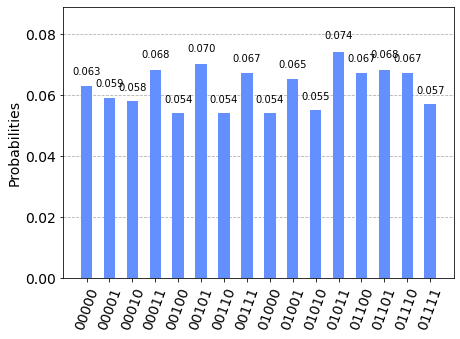

In [6]:
plot_histogram(counts[0])

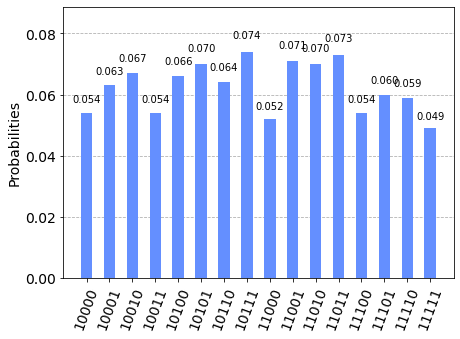

In [7]:
plot_histogram(counts[1])